In [1]:
from manim import *
import numpy as np

Manim Community v0.13.1

In [11]:
def horizontal_rule(x):
    if x % 2 == 0:
        return 1
    else:
        return 0

def vertical_rule(y):
    if y.lower() in 'aeiou':
        return 1
    else:
        return 0
    
def generate_horizontal_lines(start, min_x, max_x, y, lw=4):
    lines = []
    dots = np.arange(min_x+start, max_x, 2)
    line_cap = 0.005*lw
    for dot in dots:
        if dot + 1 < max_x:
            line = Line(start=[dot-line_cap, y, 0], end=[dot+1+line_cap, y, 0], stroke_width=lw, color="#202f66")
            lines.append(line)
    return lines

def generate_vertical_lines(start, min_y, max_y, x, lw=4):
    lines = []
    dots = np.arange(min_y+start, max_y, 2)
    line_cap = 0.005*lw
    for dot in dots:
        if dot + 1 <= max_y:
            line = Line(start=[x, dot-line_cap, 0], end=[x, dot+1+line_cap, 0], stroke_width=lw, color="#202f66")
            lines.append(line)
    return lines

def pad_text(original, length):
    original += " "
    text_length = len(original)
    fact = int(np.ceil(length/text_length))
    return (original*fact)[:length]

In [39]:
min_x = -9
max_x = 9

min_y = -9
max_y = 9

x_range = np.arange(min_x, max_x+1, 1)
y_range = np.arange(min_y, max_y+1, 1)

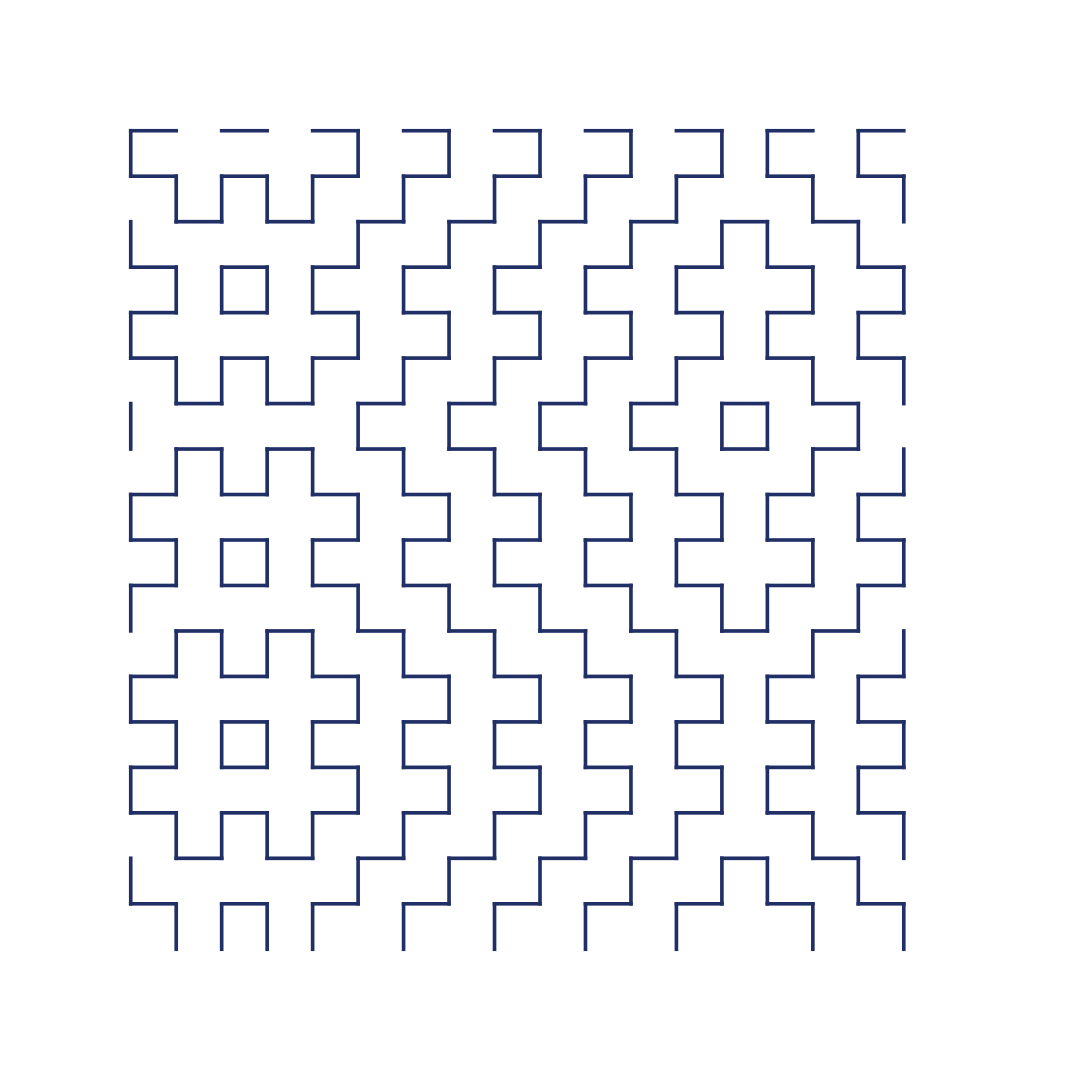

In [41]:
%%manim -v WARNING StitchPattern

config["frame_size"] = (1080, 1080)
config["frame_rate"] = 90
config["frame_width"] = len(x_range) * 1.25
config["frame_height"] = len(y_range) * 1.25
config["background_color"] = WHITE
config["save_last_frame"] = True

class StitchPattern(Scene):
    def construct(self):
        # draw horizontal lines
        pi_str = "3.141592653589793238462643383279502884197169399375105820974944592307816406286"
        pi_str = pi_str.replace(".", '')
        pi_str = pad_text(pi_str, len(y_range)-1)
        
        lw = 8
        for (i, num) in enumerate(pi_str):
            start = horizontal_rule(int(num))
            lines = generate_horizontal_lines(start, min_x, max_x, y_range[::-1][i], lw=lw)
            text = Text(num, font='Gill Sans Nova', color="#202f66").next_to([20, y_range[::-1][i], 0], RIGHT*2)
            horizontal_lines_group = VGroup(*lines, text)
            self.play(Write(horizontal_lines_group, run_time=0.2, lag_ratio=0.1))
            
        # draw vertical lines
        text = "ALTR Alicetaria"
        text =  pad_text(text, len(x_range)-1)
        for (i, char) in enumerate(text):
            start = vertical_rule(char)
            lines = generate_vertical_lines(start, min_y, max_y, x_range[i], lw=lw)
            text = Text(char.upper(), font='Gill Sans', color="#202f66").next_to([x_range[i], y_range[0], 0], DOWN*2)
            # vertical_lines_group = VGroup(*lines, text)
            vertical_lines_group = VGroup(*lines)
            self.play(Write(vertical_lines_group, run_time=0.2, lag_ratio=0.1))
        self.wait()